In [1]:
import torch
from torch.utils.data import Dataset
from binconvfm.models.linear import LinearForecaster
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Seq2SeqDataset(Dataset):
    def __init__(self, seq, input_len=24, output_len=5):
        self.input_len = input_len
        self.output_len = output_len
        self.seq = torch.tensor(seq, dtype=torch.float32)
        self.length = len(seq) - input_len - output_len + 1

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        input_seq = self.seq[idx : idx + self.input_len]
        target_seq = self.seq[idx + self.input_len : idx + self.input_len + self.output_len]
        return input_seq, target_seq

In [3]:
x_space = np.linspace(0, 100, 1000)
seq = np.sin(x_space) + np.random.randn(1000)*0.1

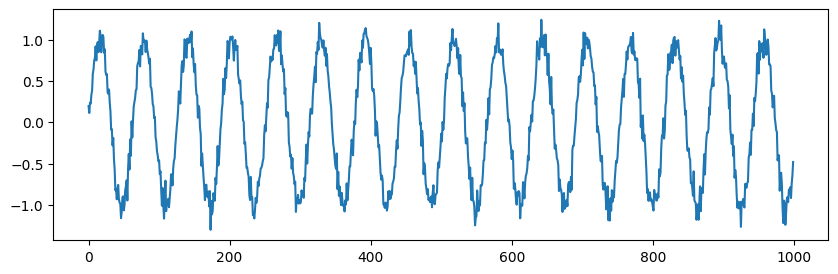

In [4]:
plt.figure(figsize=(10, 3))
plt.plot(seq)
plt.show()

In [5]:
input_len = 24
output_len = 5

train_dataset = Seq2SeqDataset(seq)
val_dataset = Seq2SeqDataset(seq)
test_dataset = Seq2SeqDataset(seq)

In [6]:
from tqdm import trange

In [9]:
model = LinearForecaster(input_len, output_len)
model.fit(train_dataset, val_dataset)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | model | Linear | 125    | train
-----------------------------------------
125       Trainable params
0         Non-trainable params
125       Total params
0.001     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=10` reached.


In [10]:
model.evaluate(test_dataset)

/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.0148471025750041
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.0148471025750041}]

In [11]:
model.predict(test_dataset)

/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

[tensor([[ 0.7875,  0.5179,  0.4680,  0.3908,  0.3588],
         [ 0.6683,  0.5644,  0.4280,  0.3571,  0.3320],
         [ 0.6358,  0.5474,  0.3933,  0.2772,  0.2332],
         ...,
         [-0.9644, -0.8837, -0.8607, -0.7805, -0.7829],
         [-1.0023, -1.0170, -0.7843, -0.6683, -0.7372],
         [-0.7119, -0.9734, -0.8229, -0.6728, -0.5840]])]